In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
transfer_stats_df = pd.read_csv('transfer_stats.csv', index_col=0)
transfer_stats_df.head()

,club_api_id,club_name,year,league_name,average_age,total_spent,nTransfers,Fifteen_TwentyTwo,TwentyThree_TwentyNine,Thirty_Plus,...,Midfielder,league_position,position_value,win_pct,goals_for,goals_against,goal_difference,three_year_spending,two_year_spending,pos_val_pct_change
0,6403,FC Paços de Ferreira,2008,Liga Nos,24.962798,0.005456,23,0.000596,0.004860,0.0,...,0.001811,10.0,55.0,0.300000,37.0,42.0,-5.0,NaN,NaN,NaN
1,6403,FC Paços de Ferreira,2009,Liga Nos,22.744444,0.004837,27,0.001192,0.003645,0.0,...,0.001215,9.0,60.0,0.266667,32.0,37.0,-5.0,NaN,0.010293,9.090909
2,6403,FC Paços de Ferreira,2010,Liga Nos,23.708333,0.060811,19,0.059596,0.001215,0.0,...,0.000000,7.0,70.0,0.333333,35.0,42.0,-7.0,0.071104,0.065648,16.666667
3,6403,FC Paços de Ferreira,2011,Liga Nos,23.792007,0.014558,35,0.001192,0.013366,0.0,...,0.002430,10.0,55.0,0.266667,35.0,53.0,-18.0,0.080206,0.075369,-21.428571
4,6403,FC Paços de Ferreira,2012,Liga Nos,22.206349,0.004814,26,0.002384,0.002430,0.0,...,0.001788,3.0,90.0,0.466667,42.0,29.0,13.0,0.080182,0.019371,63.636364


In [12]:
X = transfer_stats_df.drop(['club_api_id', 'club_name', 'league_name', 'league_position', 'position_value', 'three_year_spending', 'two_year_spending', 'pos_val_pct_change'], axis=1)
y = transfer_stats_df.position_value

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
lasso = Lasso(alpha=.4, normalize=True)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_
print(lasso_coef)
print(lasso.score(X_test, y_test))

[-0.        -0.         0.        -0.         0.         0.
  0.         0.         0.         0.        70.0677539  0.
 -0.         0.       ]
0.5984259629459794


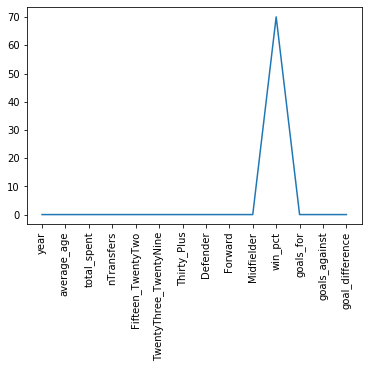

In [15]:
_ = plt.plot(range(len(X_test.columns)), lasso_coef)
_ = plt.xticks(range(len(X_test.columns)), X_test.columns, rotation=90)

In [19]:
y_pred = lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse_lasso)

13.545695642180936


In [20]:
r2_score(y_test, y_pred)

0.5984259629459794

In [21]:
regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=10, 
                                  min_samples_leaf=1, min_samples_split=5, bootstrap=False)
regressor.fit(X_train, y_train)
print(regressor.score(X_test, y_test))

y_pred = regressor.predict(X_test)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse_forest)

0.8568872811733741
8.08644461082037


In [22]:
print(r2_score(y_test, y_pred))

0.8568872811733741


In [24]:
regressor.feature_importances_

array([0.00447413, 0.0071437 , 0.00349905, 0.0063493 , 0.00608003,
       0.00401323, 0.00209906, 0.0060995 , 0.00783149, 0.00795698,
       0.65104287, 0.0105095 , 0.04154156, 0.2413596 ])

In [26]:
X_train.columns

Index(['year', 'average_age', 'total_spent', 'nTransfers', 'Fifteen_TwentyTwo',
       'TwentyThree_TwentyNine', 'Thirty_Plus', 'Defender', 'Forward',
       'Midfielder', 'win_pct', 'goals_for', 'goals_against',
       'goal_difference'],
      dtype='object')

In [28]:
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
win_pct,0.651043
goal_difference,0.241360
goals_against,0.041542
goals_for,0.010509
Midfielder,0.007957
Forward,0.007831
average_age,0.007144
nTransfers,0.006349
Defender,0.006100
Fifteen_TwentyTwo,0.006080
